# K-Nearest Neighbors (KNN) Classifier 

This notebook implements the K-Nearest Neighbors (KNN) algorithm. It supports three distance metrics:

* Euclidean Distance
* Manhattan Distance
* Cosine Similarity

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-flower-dataset/IRIS.csv


# Importing Libraries

In [2]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

We use:

* numpy for mathematical computations.
* Counter from collections to determine the most frequent class.

# Reading Data

In [3]:
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

# Exploratory Data Analysis

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


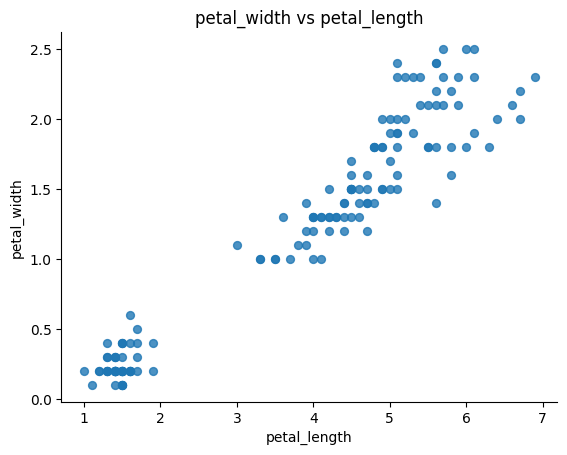

In [6]:
data.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.title('petal_width vs petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

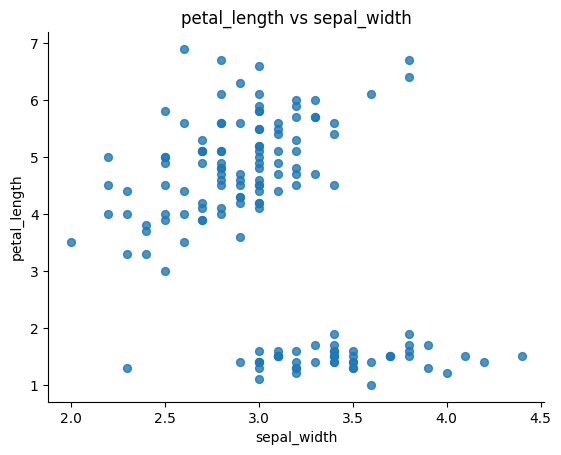

In [7]:
data.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.title('petal_length vs sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

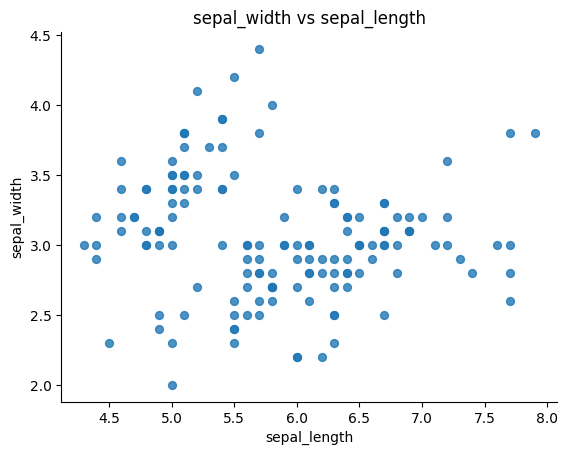

In [8]:
data.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.title('sepal_width vs sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preprocessing

## Encoding Categorical Data

In [9]:
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])

In [10]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
65,6.7,3.1,4.4,1.4,1
68,6.2,2.2,4.5,1.5,1
45,4.8,3.0,1.4,0.3,0
89,5.5,2.5,4.0,1.3,1
101,5.8,2.7,5.1,1.9,2


In [11]:
data['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

# Splitting Data

In [12]:
X = data.drop('species', axis=1)
y = data['species']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN from Scratch

The main idea behind K-Nearest Neighbors algorithm is that for each data point, the algorithm looks at the nearest k points let's say 5: 
1. The algorithm calculates the distance between this data point and all other data points.
2. The algorithm selects the nearest 5 data points (the smallest 5 distances)
3. The algorithm then looks at the labels of these 5 points, if the model is for classification, the algorithm takes the majority class (voting), and if the model is for regression, the algorithm takes the average of these points

There are lots of distance metrics out there, but we will focus on three:
1. Euclidean Distance
2. Manhattan Distance
3. Cosine Similarity

In [14]:
class KNN:
  def __init__(self, k, metric='euclidean'):
    self.k = k
    self.metric = metric

  def fit(self, X_train, y_train):
    self.X_train = np.array(X_train)
    self.y_train = np.array(y_train)

    
  def _euclidean_distance(self, A, B):
    return np.sqrt(np.sum((np.array(A) - np.array(B)) ** 2))

  def _manhattan_distance(self, A, B):
    return np.abs(np.sum(np.array(A) - np.array(B)))

  def _cosine_similarity(self, A, B):
    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return 1 - dot_product / (norm_A * norm_B) if norm_A * norm_B != 0 else 0


  def _predict_point(self, test_point):
    distances = []
    if (self.metric == "euclidean"):
      distances = [(self._euclidean_distance(self.X_train[i], test_point), self.y_train[i]) for i in range(len(self.X_train))]
        
    elif (self.metric == "manhattan"):
      distances = [(self._manhattan_distance(self.X_train[i], test_point), self.y_train[i]) for i in range(len(self.X_train))]
        
    elif (self.metric == "cosine"):
      distances = [(self._cosine_similarity(self.X_train[i], test_point), self.y_train[i]) for i in range(len(self.X_train))]

    distances.sort(key=lambda x: x[0])

    k_nearest_labels = [label for _, label in distances[:self.k]]  # get labels of the nearest k points

    most_common = Counter(k_nearest_labels).most_common(1)  # get the number of most common label

    return most_common[0][0]


  def predict(self, X_test):
    X_test = np.array(X_test)
    predictions = [self._predict_point(x) for x in X_test]
    return predictions

  def score(self, X, y):
      y_pred = self.predict(X)
      return np.mean(y_pred == np.array(y))  # accuracy calculation

## 1. KNN with euclidean distance

In [15]:
knn_euclidean = KNN(k = 3, metric = 'euclidean')
knn_euclidean.fit(X_train, y_train)

In [16]:
y_pred_euclidean = knn_euclidean.predict(X_test)
print(y_pred_euclidean)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [17]:
print('classification report for implemented KNN (Euclidean Distance):\n')
print(classification_report(y_pred_euclidean, y_test))

classification report for implemented KNN (Euclidean Distance):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



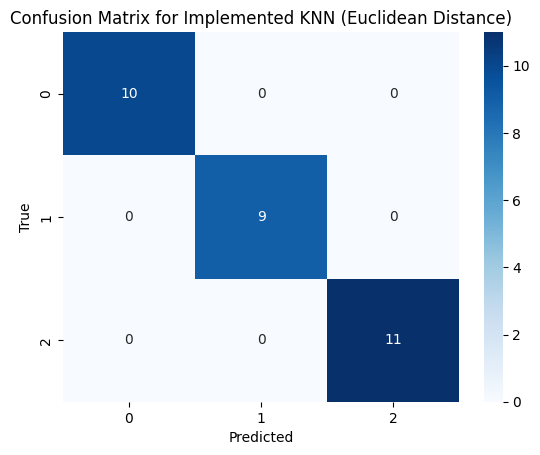

In [18]:
cm = confusion_matrix(y_test, y_pred_euclidean)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Implemented KNN (Euclidean Distance)')
plt.show()

## 2. KNN with manhattan distance

In [19]:
knn_manhattan = KNN(k = 3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

In [20]:
y_pred_manhattan = knn_manhattan.predict(X_test)
print(y_pred_manhattan)

[1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [21]:
print('classification report for implemented KNN (Manhattan Distance):\n')
print(classification_report(y_pred_manhattan, y_test))

classification report for implemented KNN (Manhattan Distance):

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.78      0.88      0.82         8
           2       1.00      0.85      0.92        13

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.90        30
weighted avg       0.91      0.90      0.90        30



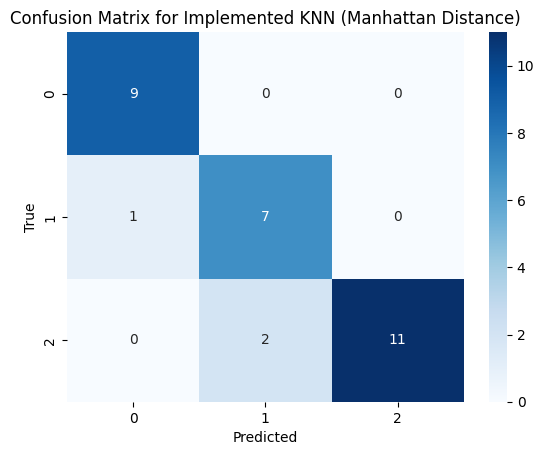

In [22]:
cm_manhattan = confusion_matrix(y_pred_manhattan, y_test)
sns.heatmap(cm_manhattan, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Implemented KNN (Manhattan Distance)')
plt.show()

## 3. KNN with cosine similarity

In [23]:
knn_cosine = KNN(k = 3, metric='cosine')
knn_cosine.fit(X_train, y_train)

In [24]:
y_pred_cosine = knn_cosine.predict(X_test)
print(y_pred_cosine)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0]


In [25]:
print('classification report for implemented KNN (Cosine Similarity):\n')
print(classification_report(y_pred_cosine, y_test))

classification report for implemented KNN (Cosine Similarity):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



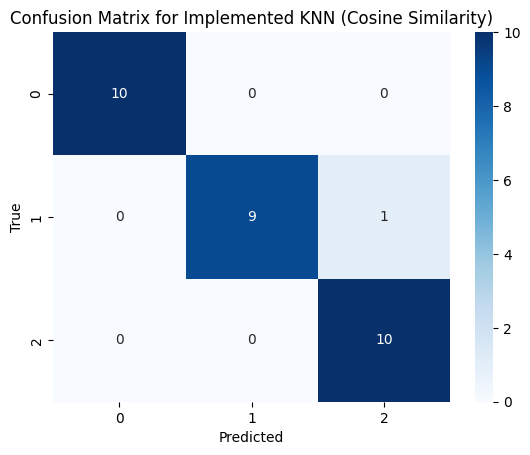

In [26]:
cm_cosine = confusion_matrix(y_pred_cosine, y_test)

sns.heatmap(cm_cosine, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Implemented KNN (Cosine Similarity)')
plt.show()

## 4. Built-in KNN with default metric measure

In [27]:
knn_builtin = KNeighborsClassifier(n_neighbors=3)
knn_builtin.fit(X_train, y_train)
y_pred_builtin = knn_builtin.predict(X_test)

In [28]:
print('classification report for built-in KNN:\n')
print(classification_report(y_pred_builtin, y_test))

classification report for built-in KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



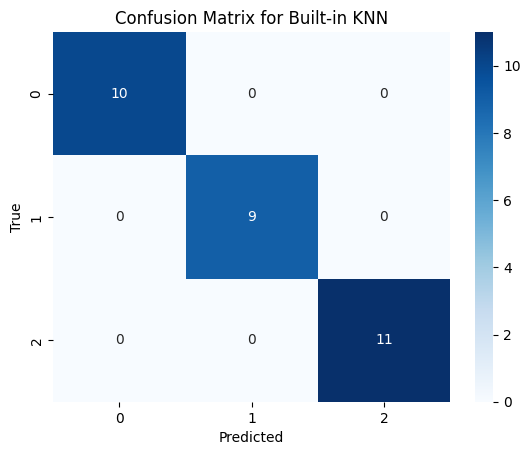

In [29]:
cm_builtin = confusion_matrix(y_pred_builtin, y_test)

sns.heatmap(cm_builtin, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Built-in KNN')
plt.show()